In [1]:
% pylab inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
% load_ext autoreload
% reload_ext autoreload
% autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import rstoolbox as rs

## Saturation mutagenesis

In [4]:
filename = "scores.sc"

In [5]:
df = pd.read_csv(filename, sep="\s+")

In [6]:
tags = df["description"].str.replace(pat="out_|:SCORE:", repl="").str.replace(pat='\d+', repl='').str.replace(pat='_vw_', repl='').as_matrix()

In [7]:
df["tags"] = pd.Series(tags, name="tags")

In [8]:
scores = df["score"]
ddg = df["ddg"]

In [9]:
# Map wt
df_wt = df.iloc[np.where(tags == "LEU_TRP_SER")]
wt_score = float(df_wt["score"])
wt_ddg = float(df_wt["ddg"])
wt_txt = "LEU_TRP_SER"

In [10]:
wt_score, wt_ddg

(-1594.381, -126.18700000000001)

## Best mutations

In [11]:
top_ddg = 50
top_score = 50

In [12]:
df_ddg = df.sort_values("ddg").head(top_ddg)[["score", "ddg", "tags"]]
df_score = df.sort_values("score").head(top_score)[["score", "ddg", "tags"]]

In [13]:
#df_ddg.to_csv("topByDdg")

In [14]:
#df_score.to_csv("topByScore")

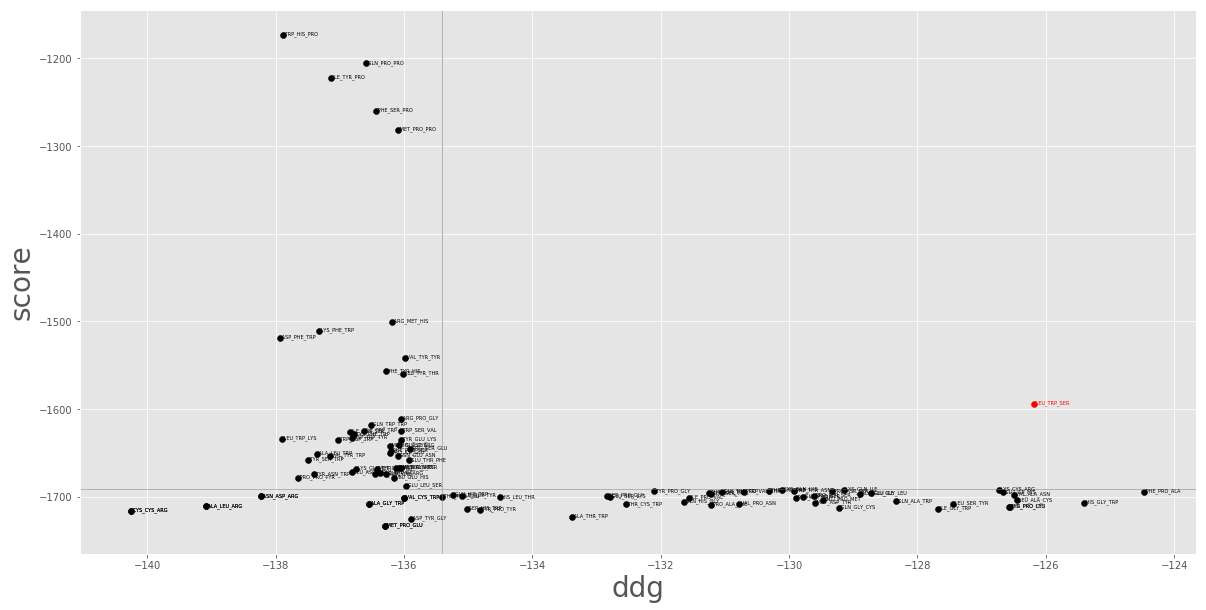

In [15]:
fig, ax = plt.subplots()
ax.scatter(df_ddg["ddg"], df_ddg["score"], color="black")
ax.scatter(df_score["ddg"], df_score["score"], color="black")
ax.scatter(wt_ddg, wt_score, color="red")
ax.annotate(" "+wt_txt, (wt_ddg,wt_score), color="red", size=5)
for i, txt_ddg in enumerate(df_ddg["tags"]):
    ax.annotate(" "+txt_ddg, (df_ddg["ddg"].tolist()[i],df_ddg["score"].tolist()[i]), size=5)
for i, txt_score in enumerate(df_score["tags"]):   
    ax.annotate(" "+txt_score, (df_score["ddg"].tolist()[i],df_score["score"].tolist()[i]), size=5)

plt.axvline(x=max(df_ddg["ddg"])+.5, linewidth=0.5, color="grey")
plt.axhline(y=max(df_score["score"])+.5, linewidth=0.5, color="grey")

plt.xlabel("ddg", fontsize=28)
plt.ylabel("score", fontsize=28)


#plt.savefig("satmut_top20.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

## Extract best decoys

In [16]:
silentfile = "satmut_19_28_45.minisilent.gz"

In [17]:
# Load fasta file or rosetta silent files
definitions = {"scores": "*", "sequence" : "B"}
df = rs.io.parse_rosetta_file(silentfile, definitions)

In [18]:
df_clean = df.sort_values("score").head(100)

In [19]:
df_ddg = df_clean.sort_values("ddg").head(100)

In [20]:
df_ddg = df_ddg[df_ddg["ddg"] < -127.0]

In [21]:
df_ddg.head(20)

,score,fa_atr,fa_rep,fa_sol,fa_intra_rep,fa_intra_sol_xover4,lk_ball_wtd,fa_elec,pro_close,hbond_sr_bb,...,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,ddg,silent_score,time,description,sequence_B
1681,-1715.960,-9571.579,1290.729,6824.689,21.448,524.827,-343.419,-2468.052,15.906,-521.64,...,2702.246,-190.675,2.345,164.695,127.113,-140.246,-1715.960,114.0,CYS_CYS_ARG_5vw1_0001,SMNINDLIREIKNKDYTVKCSGTDSNSICQLIIRVNNDGNEYVISRSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
201,-1711.003,-9570.830,1289.285,6823.237,21.542,524.426,-341.764,-2467.821,15.805,-521.64,...,2712.421,-190.647,2.268,161.172,127.453,-139.084,-1711.003,115.0,ALA_LEU_ARG_5vw1_0001,SMNINDLIREIKNKDYTVKASGTDSNSILQLIIRVNNDGNEYVISRSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
861,-1699.590,-9571.985,1293.753,6833.630,21.567,526.059,-342.921,-2466.195,16.046,-521.64,...,2712.031,-190.607,2.277,154.700,127.451,-138.223,-1699.590,110.0,ASN_ASP_ARG_5vw1_0001,SMNINDLIREIKNKDYTVKNSGTDSNSIDQLIIRVNNDGNEYVISRSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
157,-1708.111,-9556.669,1287.376,6806.159,21.424,524.601,-344.511,-2454.528,15.954,-521.64,...,2701.217,-189.919,2.162,162.664,128.466,-136.550,-1708.112,107.0,ALA_GLY_TRP_5vw1_0001,SMNINDLIREIKNKDYTVKASGTDSNSIGQLIIRVNNDGNEYVISWSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
5086,-1733.459,-9570.850,1288.575,6824.142,21.427,523.861,-343.911,-2465.868,16.084,-521.64,...,2694.284,-190.826,2.280,155.570,127.962,-136.288,-1733.458,113.0,MET_PRO_GLU_5vw1_0001,SMNINDLIREIKNKDYTVKMSGTDSNSIPQLIIRVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
7697,-1701.577,-9572.291,1298.863,6815.144,21.454,525.360,-344.958,-2460.909,15.778,-521.64,...,2707.242,-191.418,2.213,166.439,126.730,-135.999,-1701.578,106.0,VAL_CYS_TRP_5vw1_0001,SMNINDLIREIKNKDYTVKVSGTDSNSICQLIIRVNNDGNEYVISWSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
2615,-1687.607,-9566.953,1284.501,6821.418,21.612,525.155,-343.626,-2443.336,15.853,-521.64,...,2709.362,-190.609,1.904,156.928,127.318,-135.969,-1687.607,98.0,GLU_LEU_SER_5vw1_0001,SMNINDLIREIKNKDYTVKESGTDSNSILQLIIRVNNDGNEYVISSSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
1567,-1725.051,-9559.234,1280.399,6820.121,21.558,524.766,-343.046,-2469.179,15.637,-521.64,...,2704.119,-189.938,2.494,157.515,128.502,-135.884,-1725.049,132.0,ASP_TYR_GLY_5vw1_0001,SMNINDLIREIKNKDYTVKDSGTDSNSIYQLIIRVNNDGNEYVISGSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
6825,-1681.171,-9590.083,1307.615,6833.761,21.483,526.634,-345.776,-2464.560,15.409,-521.64,...,2729.941,-190.999,2.274,158.996,127.408,-135.412,-1681.171,109.0,TRP_ARG_GLN_5vw1_0001,SMNINDLIREIKNKDYTVKWSGTDSNSIRQLIIRVNNDGNEYVISQSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
6686,-1699.794,-9562.969,1284.435,6819.410,21.408,524.931,-342.889,-2450.584,15.840,-521.64,...,2705.072,-191.075,2.091,155.064,127.959,-135.403,-1699.795,100.0,THR_PRO_GLU_5vw1_0001,SMNINDLIREIKNKDYTVKTSGTDSNSIPQLIIRVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE


In [22]:
#rs.io.make_structures( df_ddg, outdir="topDdg_clean" )

In [23]:
df_score = df.sort_values("score").head(10)

In [24]:
df_score.head(10)

,score,fa_atr,fa_rep,fa_sol,fa_intra_rep,fa_intra_sol_xover4,lk_ball_wtd,fa_elec,pro_close,hbond_sr_bb,...,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,ddg,silent_score,time,description,sequence_B
5086,-1733.459,-9570.850,1288.575,6824.142,21.427,523.861,-343.911,-2465.868,16.084,-521.64,...,2694.284,-190.826,2.280,155.570,127.962,-136.288,-1733.458,113.0,MET_PRO_GLU_5vw1_0001,SMNINDLIREIKNKDYTVKMSGTDSNSIPQLIIRVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
1567,-1725.051,-9559.234,1280.399,6820.121,21.558,524.766,-343.046,-2469.179,15.637,-521.64,...,2704.119,-189.938,2.494,157.515,128.502,-135.884,-1725.049,132.0,ASP_TYR_GLY_5vw1_0001,SMNINDLIREIKNKDYTVKDSGTDSNSIYQLIIRVNNDGNEYVISGSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
337,-1722.881,-9568.872,1286.895,6819.468,21.432,525.475,-341.403,-2467.836,15.563,-521.64,...,2703.147,-190.494,2.358,163.018,127.960,-133.378,-1722.884,135.0,ALA_THR_TRP_5vw1_0001,SMNINDLIREIKNKDYTVKASGTDSNSITQLIIRVNNDGNEYVISWSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
1681,-1715.960,-9571.579,1290.729,6824.689,21.448,524.827,-343.419,-2468.052,15.906,-521.64,...,2702.246,-190.675,2.345,164.695,127.113,-140.246,-1715.960,114.0,CYS_CYS_ARG_5vw1_0001,SMNINDLIREIKNKDYTVKCSGTDSNSICQLIIRVNNDGNEYVISRSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
7498,-1714.892,-9576.072,1300.476,6820.642,21.505,524.218,-343.210,-2462.975,16.829,-521.64,...,2699.789,-191.269,2.265,157.802,127.577,-134.821,-1714.894,106.0,TYR_PRO_TYR_5vw1_0001,SMNINDLIREIKNKDYTVKYSGTDSNSIPQLIIRVNNDGNEYVISYSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
3757,-1714.223,-9568.324,1286.600,6818.785,21.468,525.464,-344.557,-2456.933,15.698,-521.64,...,2698.363,-191.040,2.271,163.643,127.523,-127.688,-1714.224,109.0,ILE_GLY_TRP_5vw1_0001,SMNINDLIREIKNKDYTVKISGTDSNSIGQLIIRVNNDGNEYVISWSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
6177,-1713.639,-9576.134,1294.606,6827.532,21.451,525.414,-344.633,-2463.164,15.792,-521.64,...,2702.147,-190.704,2.267,159.951,127.424,-135.015,-1713.641,116.0,SER_HIS_TRP_5vw1_0001,SMNINDLIREIKNKDYTVKSSGTDSNSIHQLIIRVNNDGNEYVISWSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
2144,-1712.612,-9560.072,1280.057,6820.266,21.402,524.684,-342.793,-2452.165,15.595,-521.64,...,2690.040,-189.940,2.147,160.882,128.027,-129.220,-1712.612,102.0,GLN_GLY_CYS_5vw1_0001,SMNINDLIREIKNKDYTVKQSGTDSNSIGQLIIRVNNDGNEYVISCSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
7484,-1711.557,-9571.123,1288.536,6817.814,21.432,524.599,-342.839,-2453.064,15.795,-521.64,...,2699.646,-191.000,2.185,160.474,127.749,-126.570,-1711.555,102.0,TYR_PRO_CYS_5vw1_0001,SMNINDLIREIKNKDYTVKYSGTDSNSIPQLIIRVNNDGNEYVISCSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE
3490,-1711.543,-9570.777,1285.480,6820.616,21.419,524.732,-342.341,-2450.246,15.982,-521.64,...,2700.458,-191.420,2.115,157.998,127.869,-126.551,-1711.545,102.0,HIS_PRO_LEU_5vw1_0001,SMNINDLIREIKNKDYTVKHSGTDSNSIPQLIIRVNNDGNEYVISLSENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE


In [25]:
#rs.io.make_structures( df_score, outdir="topScore" )